<a href="https://colab.research.google.com/github/panimesh14/Generative-Adersarial-Networks-GANs/blob/main/Deep_Convolutional_Generative_Adversarial_Networks(DCGAN)_Generative_Models_on_MNIST_Digit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Convolutional-Generative Adversarial Networks(DCGAN) Generative Models on MNIST Digit Dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [27]:

#Data Loading/MNIST
from tensorflow.keras.datasets import mnist
#dataset=mnist.load_data()
(Xtrain,ytrain),(Xtest,ytest)=mnist.load_data()

In [28]:

#Scaling and Normalizing between -1 and +1
Xtrain=Xtrain/255;
#Scaling between -1 and +1
Xtrain=Xtrain*2-1

In [4]:
#Extracting number 4
data=Xtrain[ytrain==4]
#Image encoding size for Generator
img_encoding_size=100;

In [20]:
#Checking for number 0
data=Xtrain[ytrain==0]

In [29]:

#Find data of interest from a dataset
def data_extraction(Xtrain,ytrain,num):
    data=Xtrain[ytrain==num]
    return data

In [30]:
#Image Dataset Parameters
num_img,m,n=Xtrain.shape
#Encode parameters beginning from 7x7
M=7;
N=7;

In [31]:
#Converting to tensorflow pipeline data
def data_preparation(data,batch_size=32):
    batch_size=batch_size;
    dataset=tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size=1000)
    X_batch=dataset.batch(batch_size,drop_remainder=True).prefetch(1)
    return X_batch

In [7]:
#DCGAN model building

In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,Conv2DTranspose,Dropout,LeakyReLU,BatchNormalization,Flatten,Reshape

In [10]:
#Generator 7x7->14x14->28x28
gen=Sequential()
gen.add(Dense(M*N*128,input_shape=[img_encoding_size]))
gen.add(Reshape((M,N,128)))
gen.add(BatchNormalization())
gen.add(Conv2DTranspose(64,kernel_size=5,activation='relu',strides=2,padding='same'))
gen.add(BatchNormalization())
gen.add(Conv2DTranspose(1,kernel_size=5,activation='tanh',strides=2,padding='same'))

In [11]:
#Discriminator Model
disc=Sequential()
disc.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation=LeakyReLU(0.3),input_shape=[m,n,1]))
disc.add(Dropout(0.5))
disc.add(Conv2D(128,kernel_size=5,strides=2,padding='same',activation=LeakyReLU(0.3)))
disc.add(Dropout(0.5))
disc.add(Flatten())
disc.add(Dense(1,activation='sigmoid'))

In [12]:
disc.compile(loss='binary_crossentropy',optimizer='adam')

In [13]:
#Generative Adversarial Networks
DCGAN=Sequential([gen,disc])
DCGAN.layers[1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 212,865
Non-tr

In [14]:
DCGAN.compile(loss='binary_crossentropy',optimizer='adam')
DCGAN.summary()
disc.trainable=False

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         840705    
                                                                 
 sequential_2 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,053,570
Trainable params: 1,053,186
Non-trainable params: 384
_________________________________________________________________


In [35]:
#Alternate switching
def deepconvgan(X_batch,DCGAN,epoch,batch_size,image_encoding_size,):
    epochs=epoch;
    gen,disc=DCGAN.layers
    for e in range(epochs):
        print("Epoch",e);
        ind=0;#Updating index for each epoch
        for img_batch in X_batch:
            ind=ind+1;
            if(ind%100==1):
               print('Batch numbers',ind)
            noise=tf.random.normal(shape=[batch_size,img_encoding_size])
            fakes=tf.squeeze(gen(noise),axis=-1);
            #print(tf.squeeze(fakes,axis=-1).shape);
            #print(tf.expand_dims(img_batch,axis=-1).shape)
            #break;
            X=tf.concat([fakes,tf.dtypes.cast(img_batch,tf.float32)],axis=0)
            y=tf.constant([0.0]*(batch_size)+[1.0]*(batch_size))
            #Disriminator Train
            disc.trainable=True
            disc.train_on_batch(X,y)
         
            #Generator Training
            disc.trainable=False#disc off
            fake_img=tf.random.normal(shape=[batch_size,img_encoding_size])
            y_gen=tf.constant([1.0]*(batch_size))
            DCGAN.train_on_batch(fake_img,y_gen)
    return gen,disc,DCGAN

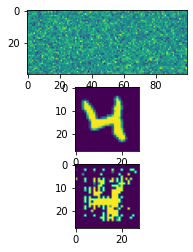

In [16]:
noisy_img=tf.random.normal(shape=[batch_size,img_encoding_size])
plt.subplot(3,1,1)
plt.imshow(noisy_img)
plt.subplot(3,1,2)
plt.imshow(data[2])
plt.subplot(3,1,3)
gen_img= tf.squeeze(gen(noisy_img),axis=-1)
plt.imshow(gen_img[2])

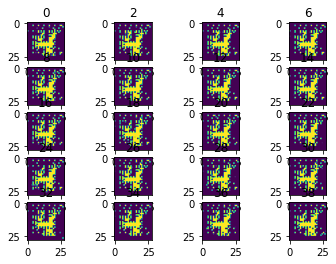

In [19]:
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(gen_img[i*2])
    plt.title(i*2)
#Image quality better than Simple GAN
#DCGAN also seems prone to mode collapse like Simple GAN
#All images of 4 give similar appearance
#Change in training epochs, number of layers, batch size, kernel size, number of filters may improve the result

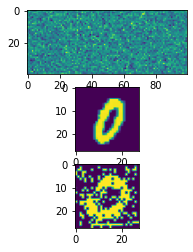

In [23]:

# For number 0
noisy_img=tf.random.normal(shape=[batch_size,img_encoding_size])
plt.subplot(3,1,1)
plt.imshow(noisy_img)
plt.subplot(3,1,2)
plt.imshow(data[2])
plt.subplot(3,1,3)
gen_img= tf.squeeze(gen(noisy_img),axis=-1)
plt.imshow(gen_img[2])

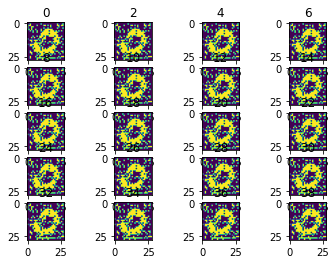

In [24]:
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(gen_img[i*2])
    plt.title(i*2)
#Mode Collapse for number 0 like number 4

In [48]:
#For number 8 Generative Model
num=8
batch_size=32
image_encoding_size=100;
epoch=100;
data=data_extraction(Xtrain,ytrain,num)
X_batch=data_preparation(data,batch_size)
gen,disc,DCGAN=deepconvgan(X_batch,DCGAN,epoch,batch_size,image_encoding_size)

Epoch 0
Batch numbers 1
Batch numbers 101
Epoch 1
Batch numbers 1
Batch numbers 101
Epoch 2
Batch numbers 1
Batch numbers 101
Epoch 3
Batch numbers 1
Batch numbers 101
Epoch 4
Batch numbers 1
Batch numbers 101
Epoch 5
Batch numbers 1
Batch numbers 101
Epoch 6
Batch numbers 1
Batch numbers 101
Epoch 7
Batch numbers 1
Batch numbers 101
Epoch 8
Batch numbers 1
Batch numbers 101
Epoch 9
Batch numbers 1
Batch numbers 101
Epoch 10
Batch numbers 1
Batch numbers 101
Epoch 11
Batch numbers 1
Batch numbers 101
Epoch 12
Batch numbers 1
Batch numbers 101
Epoch 13
Batch numbers 1
Batch numbers 101
Epoch 14
Batch numbers 1
Batch numbers 101
Epoch 15
Batch numbers 1
Batch numbers 101
Epoch 16
Batch numbers 1
Batch numbers 101
Epoch 17
Batch numbers 1
Batch numbers 101
Epoch 18
Batch numbers 1
Batch numbers 101
Epoch 19
Batch numbers 1
Batch numbers 101
Epoch 20
Batch numbers 1
Batch numbers 101
Epoch 21
Batch numbers 1
Batch numbers 101
Epoch 22
Batch numbers 1
Batch numbers 101
Epoch 23
Batch number

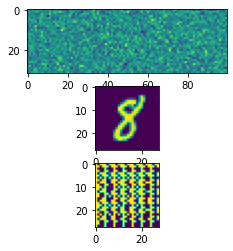

In [49]:
# For number 8
noisy_img=tf.random.normal(shape=[batch_size,img_encoding_size])
plt.subplot(3,1,1)
plt.imshow(noisy_img)
plt.subplot(3,1,2)
plt.imshow(data[2])
plt.subplot(3,1,3)
gen_img= tf.squeeze(gen(noisy_img),axis=-1)
plt.imshow(gen_img[2])

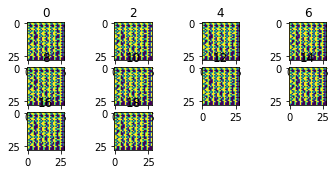

In [50]:
for i in range(10):
    plt.subplot(5,4,i+1)
    plt.imshow(gen_img[i*2])
    plt.title(i*2)
#Mode Collapse and complete inability to recreate for number 8 l